# Homework 4. SNN model

In [24]:
import numpy as np
import matplotlib.pyplot as plt

*1. Реализовать модель импульсной нейронной сети*

In [19]:
nu = 1 # the threshold
tau = 1 #time constant
tau_s = 1 #time constant
u_spike = 1
#d_ijax describes the axonal transmission delay

In [20]:
def eta(s):
    return -nu * np.exp(-s / tau) * (1 if s > 0 else 0)
def epsilon(s, d_ijax):
    return (s - d_ijax) / tau_s * np.exp(-(s - d_ijax) / tau_s) * (1 if s - d_ijax > 0 else 0)    

In [21]:
def plot(xs, ys, color, label, xlabel, ylabel):
    plt.plot(xs, ys, color, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')

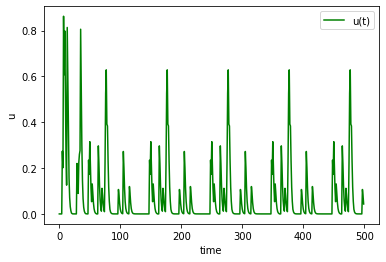

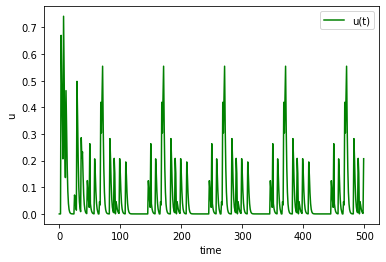

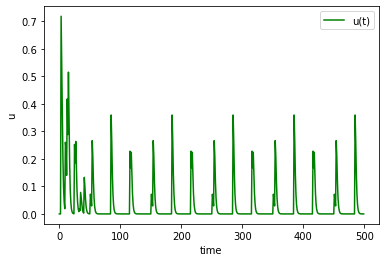

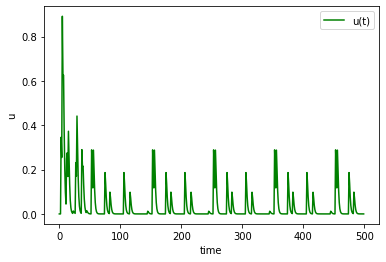

In [31]:
class SRM:
    def __init__(self, in_neurons, hid_neurons1, hid_neurons2, out_neurons):
        self.in_neurons = in_neurons
        self.hid_neurons1 = hid_neurons1
        self.hid_neurons2 = hid_neurons2
        self.out_neurons = out_neurons

        self.u1 = np.zeros((1000, hid_neurons1))
        self.u2 = np.zeros((1000, hid_neurons2))
        self.u3 = np.zeros((1000, out_neurons))

        self.syn_cnt1 = np.random.randint(low=1, high=6, size=(in_neurons, hid_neurons1))
        self.syn_cnt2 = np.random.randint(low=1, high=6, size=(hid_neurons1, hid_neurons2))
        self.syn_cnt3 = np.random.randint(low=1, high=6, size=(hid_neurons2, out_neurons)) 

        self.w1 = np.random.random((in_neurons, hid_neurons1))
        self.w2 = np.random.random((hid_neurons1, hid_neurons2))
        self.w3 = np.random.random((hid_neurons2, out_neurons))

        self.d1 = np.random.randint(low=1, high=8, size=(in_neurons, hid_neurons1))
        self.d2 = np.random.randint(low=1, high=8, size=(hid_neurons1, hid_neurons2))
        self.d3 = np.random.randint(low=1, high=8, size=(hid_neurons2, out_neurons))

        self.prev_t0 = np.zeros(in_neurons)
        self.prev_t1 = np.zeros(hid_neurons1)
        self.prev_t2 = np.zeros(hid_neurons2)
        self.prev_t3 = np.zeros(out_neurons)

    def model(self, input_layer, t):
        for i in range(in_neurons):
            if input_layer[i] == 1:
                self.prev_t0[i] = t

        for i in range(hid_neurons1):
            self.u1[t, i] = eta(t - self.prev_t1[i])
            for j in range(in_neurons):
                self.u1[t, i] += self.w1[j, i] * epsilon(t - self.prev_t0[j] - self.d1[j, i], self.d1[j, i])
            if self.u1[t, i] > u_spike:
                self.prev_t1[i] = t

        for i in range(hid_neurons2):
            self.u2[t, i] = eta(t - self.prev_t2[i])
            for j in range(hid_neurons1):
                self.u2[t, i] += self.w2[j, i] * epsilon(t - self.prev_t1[j] - self.d2[j, i], self.d2[j, i])
            if self.u2[t, i] > u_spike:
                self.prev_t2[i] = t

        for i in range(out_neurons):
            self.u3[i] = eta(t - self.prev_t3[i])
            for j in range(hid_neurons2):
                self.u3[t, i] += self.w3[j, i] * epsilon(t - self.prev_t2[j] - self.d3[j, i], self.d3[j, i])
            if self.u3[t, i] > u_spike:
                self.prev_t3[i] = t

    def visualize_u(self, maxT, text=""):
        tim = np.arange(maxT)
        for i in range(out_neurons):
            plot(tim, self.u3[:maxT, i], 'g', 'u(t)', 'time', 'u')
            plt.show()
            plt.close()


if __name__ == "__main__":
    path = "data"
    lam = 25
    for it in range(2):
        in_neurons = 30
        out_neurons = 2

        hid_neurons1 = 20
        hid_neurons2 = 10

        T = 100
        input_pattern = np.zeros((T, in_neurons))
        for i in range(in_neurons):
            j = -1
            while j < T:
                j += np.random.poisson(lam, 1)
                if j >= T:
                    break
                input_pattern[j, i] = 1

        model_snn1 = SRM(in_neurons, 20, 10, 2)
        epoch_cnt = 5
        for epoch in range(epoch_cnt):
            for tt in range(T):
                model_snn1.model(input_pattern[tt], epoch * T + tt)

        model_snn1.visualize_u(T * epoch_cnt, text="_")
